<a href="https://colab.research.google.com/github/shamanenas/ml/blob/main/cnn_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as ts
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 3s 0us/step


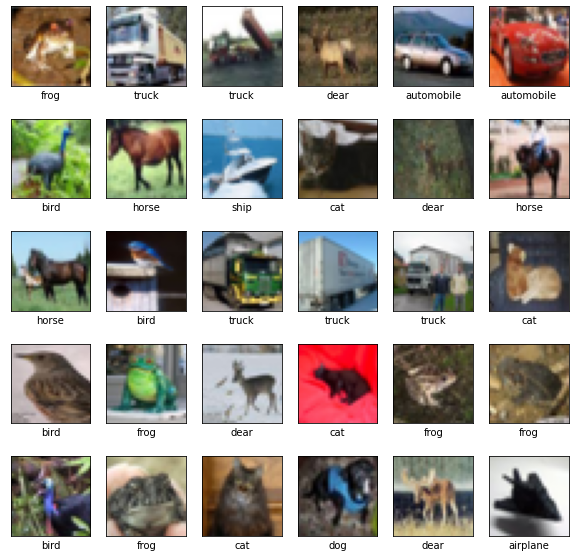

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0

In [11]:
model.compile(optimizer='adam',
              loss=ts.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# train
history = model.fit(train_images, train_labels, epochs=10,
                     validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5336 - accuracy: 0.4398 - val_loss: 1.2490 - val_accuracy: 0.5473
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1582 - accuracy: 0.5924 - val_loss: 1.0524 - val_accuracy: 0.6292
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0012 - accuracy: 0.6486 - val_loss: 0.9733 - val_accuracy: 0.6568
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8963 - accuracy: 0.6859 - val_loss: 0.9457 - val_accuracy: 0.6689
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8294 - accuracy: 0.7082 - val_loss: 0.9486 - val_accuracy: 0.6746
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7694 - accuracy: 0.7296 - val_loss: 0.8878 - val_accuracy: 0.6944
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7179 - accuracy: 0.7483 - val_loss: 0.8614 -